In [1]:
import os
import pandas as pd

os.chdir("C:/Users/James/Downloads")

In [2]:
data ='Chicagocrimeanalysis.csv'
df = pd.read_csv(data)

C:\Users\James\AppData\Local\Temp\ipykernel_10964\3663719504.py:2: DtypeWarning: Columns (0,8,9,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data)


In [3]:
df.shape  #finding the number of rows and columns  in our dataset

(402873, 22)

In [4]:
df.head()  #Getting the first ten  rows of the data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015.0,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402873 entries, 0 to 402872
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    402873 non-null  object 
 1   Case Number           402869 non-null  object 
 2   Date                  402869 non-null  object 
 3   Block                 402869 non-null  object 
 4   IUCR                  402869 non-null  object 
 5   Primary Type          402869 non-null  object 
 6   Description           402869 non-null  object 
 7   Location Description  399734 non-null  object 
 8   Arrest                402869 non-null  object 
 9   Domestic              402869 non-null  object 
 10  Beat                  402869 non-null  float64
 11  District              402868 non-null  float64
 12  Ward                  402658 non-null  float64
 13  Community Area        402660 non-null  float64
 14  FBI Code              402869 non-null  object 
 15  

##  We only need to get the following columns
* ID
* Year when the crime was commited
* Description of the type of the crime
* Location where the crime happend
* Block
* Arrest: If the perpetrator was arrested or not

In [6]:
df = df[['ID','Year','Description','Block','Arrest']]
df.head(5)

,ID,Year,Description,Block,Arrest
0,11037294,2015.0,FINANCIAL IDENTITY THEFT OVER $ 300,0000X W WACKER DR,False
1,11646293,2018.0,FINANCIAL IDENTITY THEFT $300 AND UNDER,023XX N LOCKWOOD AVE,False
2,11645836,2016.0,FINANCIAL IDENTITY THEFT OVER $ 300,055XX S ROCKWELL ST,False
3,11645959,2018.0,TELEPHONE THREAT,045XX N ALBANY AVE,False
4,11645601,2014.0,FINANCIAL IDENTITY THEFT OVER $ 300,087XX S SANGAMON ST,False


In [7]:
df.shape

(402873, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402873 entries, 0 to 402872
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           402873 non-null  object 
 1   Year         402869 non-null  float64
 2   Description  402869 non-null  object 
 3   Block        402869 non-null  object 
 4   Arrest       402869 non-null  object 
dtypes: float64(1), object(4)
memory usage: 15.4+ MB


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [10]:
data = df['Description'].value_counts(normalize = True)
data

Description
SIMPLE                                    0.109872
DOMESTIC BATTERY SIMPLE                   0.085047
$500 AND UNDER                            0.072445
TO VEHICLE                                0.059277
OVER $500                                 0.058096
                                            ...   
POSSESS KEYS OR DEVICE TO COIN MACHINE    0.000002
AGGRAVATED: OTHER DANGEROUS WEAPON        0.000002
AGG PRO.EMP: OTHER FIREARM                0.000002
EMPLOY MINOR                              0.000002
SALE OF TOBACCO PRODUCTS TO MINOR         0.000002
Name: proportion, Length: 452, dtype: float64

In [11]:
data.describe()

count    452.000000
mean       0.002212
std        0.009457
min        0.000002
25%        0.000017
50%        0.000122
75%        0.000775
max        0.109872
Name: proportion, dtype: float64

In [12]:
df

,ID,Year,Description,Block,Arrest
0,11037294,2015.0,FINANCIAL IDENTITY THEFT OVER $ 300,0000X W WACKER DR,False
1,11646293,2018.0,FINANCIAL IDENTITY THEFT $300 AND UNDER,023XX N LOCKWOOD AVE,False
2,11645836,2016.0,FINANCIAL IDENTITY THEFT OVER $ 300,055XX S ROCKWELL ST,False
3,11645959,2018.0,TELEPHONE THREAT,045XX N ALBANY AVE,False
4,11645601,2014.0,FINANCIAL IDENTITY THEFT OVER $ 300,087XX S SANGAMON ST,False
...,...,...,...,...,...
402868,12554396,2021.0,SIMPLE,045XX S DREXEL BLVD,False
402869,"""error"" : true",NaN,NaN,NaN,NaN
402870,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN
402871,"""status"" : 500",NaN,NaN,NaN,NaN


In [13]:
df.dropna(subset = ['Description'],inplace =True)
df

,ID,Year,Description,Block,Arrest
0,11037294,2015.0,FINANCIAL IDENTITY THEFT OVER $ 300,0000X W WACKER DR,False
1,11646293,2018.0,FINANCIAL IDENTITY THEFT $300 AND UNDER,023XX N LOCKWOOD AVE,False
2,11645836,2016.0,FINANCIAL IDENTITY THEFT OVER $ 300,055XX S ROCKWELL ST,False
3,11645959,2018.0,TELEPHONE THREAT,045XX N ALBANY AVE,False
4,11645601,2014.0,FINANCIAL IDENTITY THEFT OVER $ 300,087XX S SANGAMON ST,False
...,...,...,...,...,...
402864,12559071,2021.0,SIMPLE,030XX N CICERO AVE,False
402865,12475623,2021.0,CREDIT CARD FRAUD,096XX S WOODLAWN AVE,False
402866,12445764,2021.0,SIMPLE,053XX S DORCHESTER AVE,False
402867,12594302,2022.0,AUTOMOBILE,008XX S WABASH AVE,False


### Checking the top 10 Crimes in chicago

In [14]:
top10Crimes = pd.value_counts(df['Description'])[:10]
top10Crimes


Description
SIMPLE                     44264
DOMESTIC BATTERY SIMPLE    34263
$500 AND UNDER             29186
TO VEHICLE                 23881
OVER $500                  23405
TO PROPERTY                21561
AUTOMOBILE                 20203
RETAIL THEFT               12778
FROM BUILDING              10358
FORCIBLE ENTRY              9461
Name: count, dtype: int64

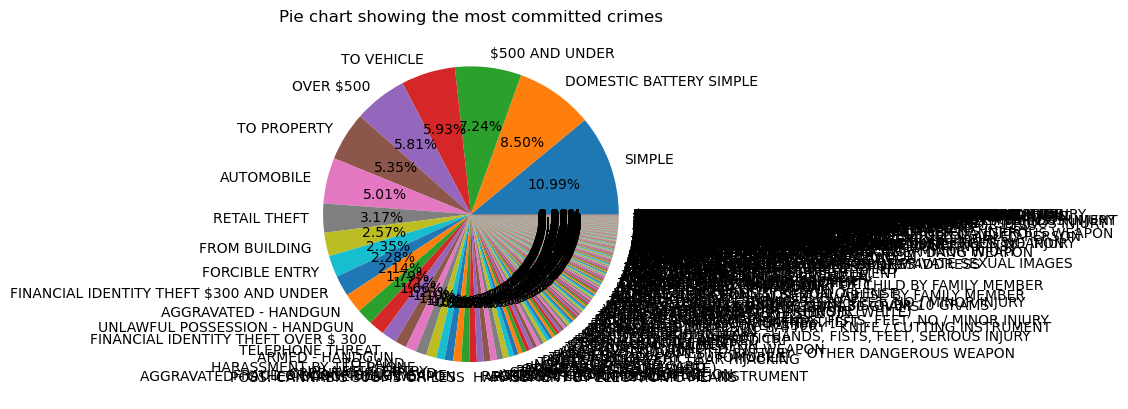

In [15]:
plt.pie(df["Description"].value_counts(),labels = df["Description"].value_counts().index,autopct = "%.2f%%")
plt.title("Pie chart showing the most committed crimes")
plt.show()

We can see that Simple crimes were the most committed crimes 

### Checking the oldest data point in the data set

In [16]:
z = df[["Year","Description","Arrest"]].groupby("Description").mean().sort_values(by="Year",ascending = True)[:10]
z

,Year,Arrest
Description,,
AGGRAVATED DOMESTIC BATTERY,2002.000000,0.0
$300 AND UNDER,2004.000000,0.0
UNLAWFUL SALE HANDGUN,2004.000000,0.5
FINANCIAL ID THEFT: OVER $300,2004.687421,0.008895
FINANCIAL ID THEFT:$300 &UNDER,2004.805085,0.016949
VIO BAIL BOND: DOM VIOLENCE,2004.818182,0.727273
AGG: FINANCIAL ID THEFT,2004.934783,0.021739
AGG: HANDS/FIST/FEET NO/MINOR INJURY,2004.947368,0.210526
LOTTERY/PARLAY CARDS,2005.000000,1.0


### Checking the year with the highest number of crime

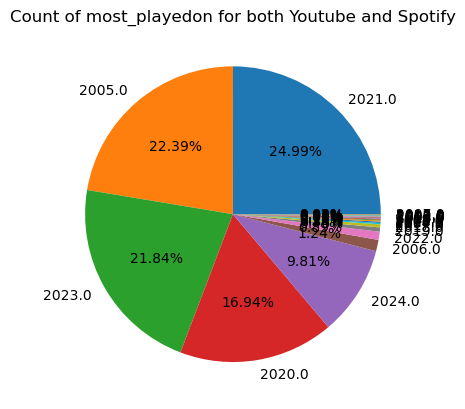

Year
2021.0    100691
2005.0     90193
2023.0     88001
2020.0     68245
2024.0     39509
2006.0      5005
2022.0      3591
2019.0      1869
2018.0      1371
2017.0       593
2004.0       564
2016.0       468
2015.0       413
2008.0       378
2009.0       364
2014.0       314
2002.0       239
2013.0       209
2001.0       177
2003.0       176
2012.0       144
2011.0       139
2010.0       126
2007.0        90
Name: count, dtype: int64

In [23]:
plt.pie(df["Year"].value_counts(),labels = df["Year"].value_counts().index,autopct = "%.2f%%")
plt.title("Count of most_playedon for both Youtube and Spotify")
plt.show()
df["Year"].value_counts()

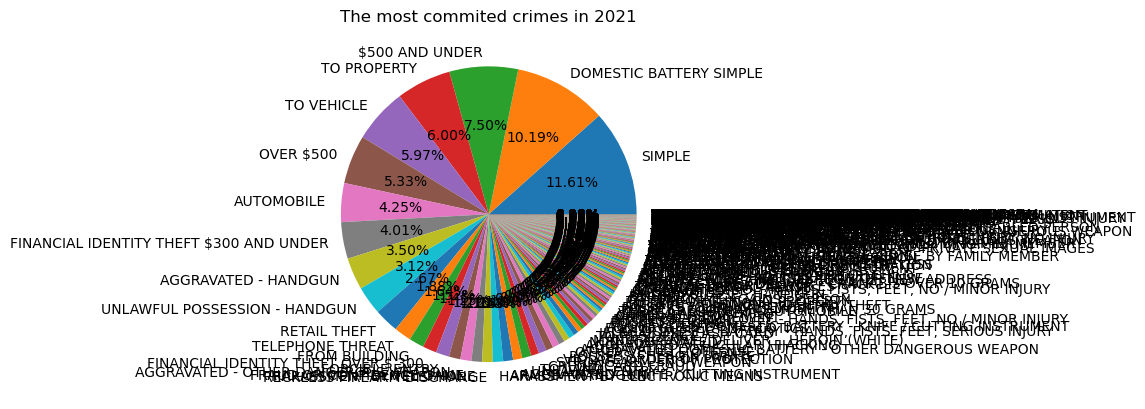

In [18]:
Year2021=df[df['Year']==2021]
plt.pie(Year2021["Description"].value_counts(),labels = Year2021["Description"].value_counts().index,autopct = "%.2f%%")
plt.title("The most commited crimes in 2021")
plt.show()


### Five most common crimes in 2020

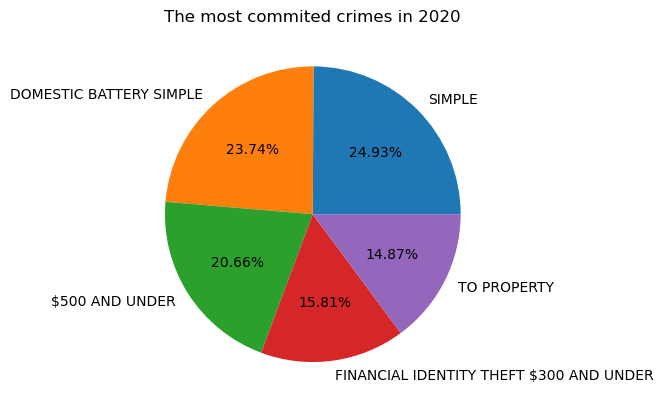

In [19]:
Year2020=df[df['Year']==2020]



fiveMostCrimes = Year2020["Description"].value_counts()
Allabels = Year2020["Description"].value_counts().index
labels = Allabels[:5]
data = fiveMostCrimes[:5]
plt.pie(data,labels= labels,autopct = "%.2f%%")
plt.title("The most commited crimes in 2020")
plt.show()


In [20]:
requestedDescription = ['SIMPLE', 'DOMESTIC BATTERY SIMPLE', '$500 AND UNDER','FINANCIAL IDENTITY THEFT $300 AND UNDER', 'TO PROPERTY']
mask = Year2020['Description'].isin(requestedDescription)
allrequested = Year2020[mask]

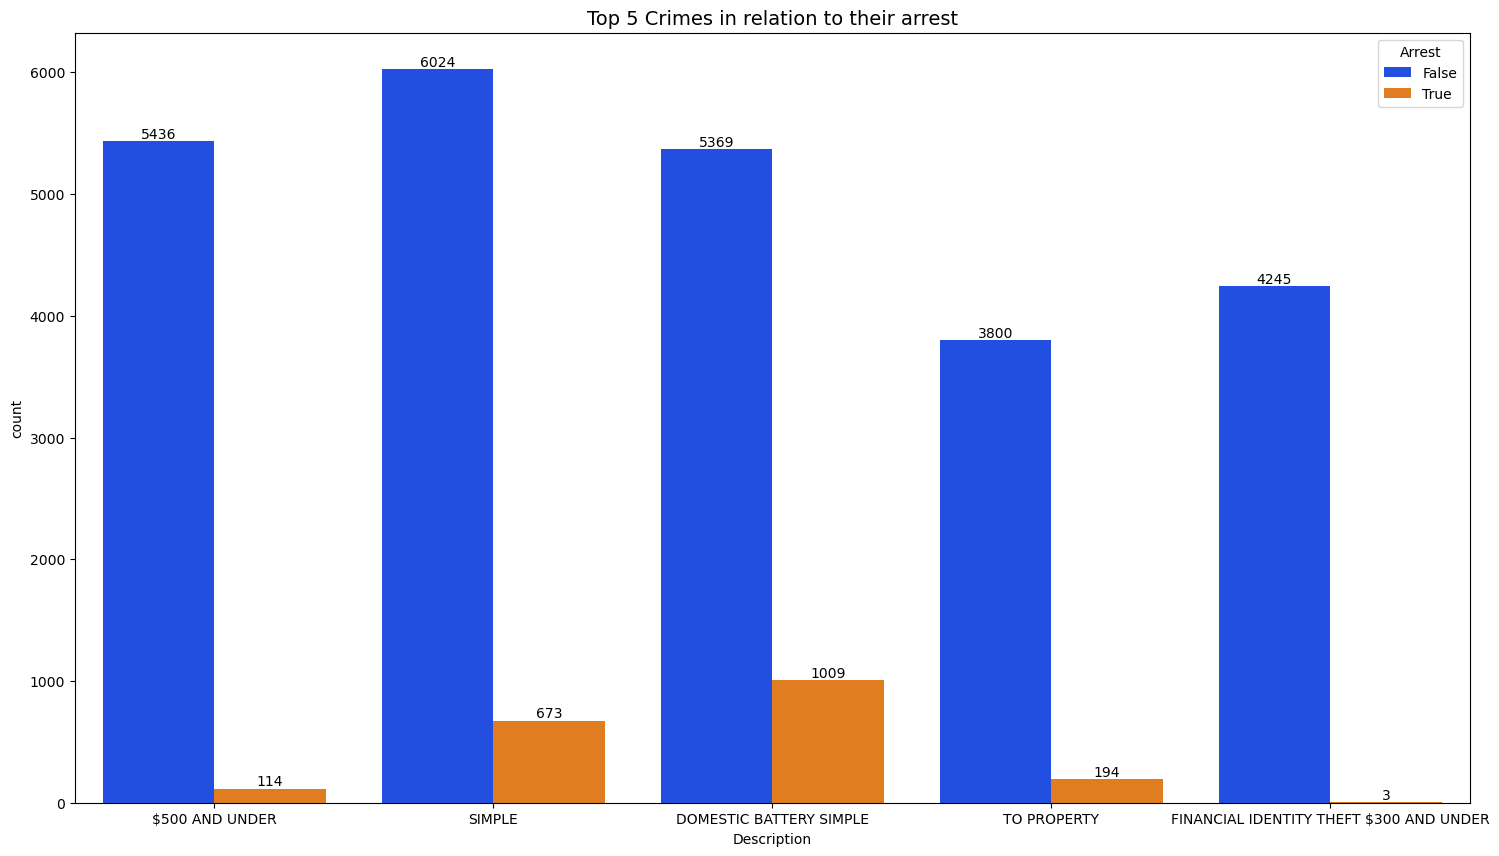

In [21]:
fig = plt.figure(figsize=(18,10))
ax = sns.countplot(x = "Description",hue = "Arrest",palette = "bright",data = allrequested )

for label in ax.containers:
    ax.bar_label(label)
plt.title("Top 5 Crimes in relation to their arrest",fontsize = 14)
plt.show()

### Which year had the highest crimes leading to Arrest

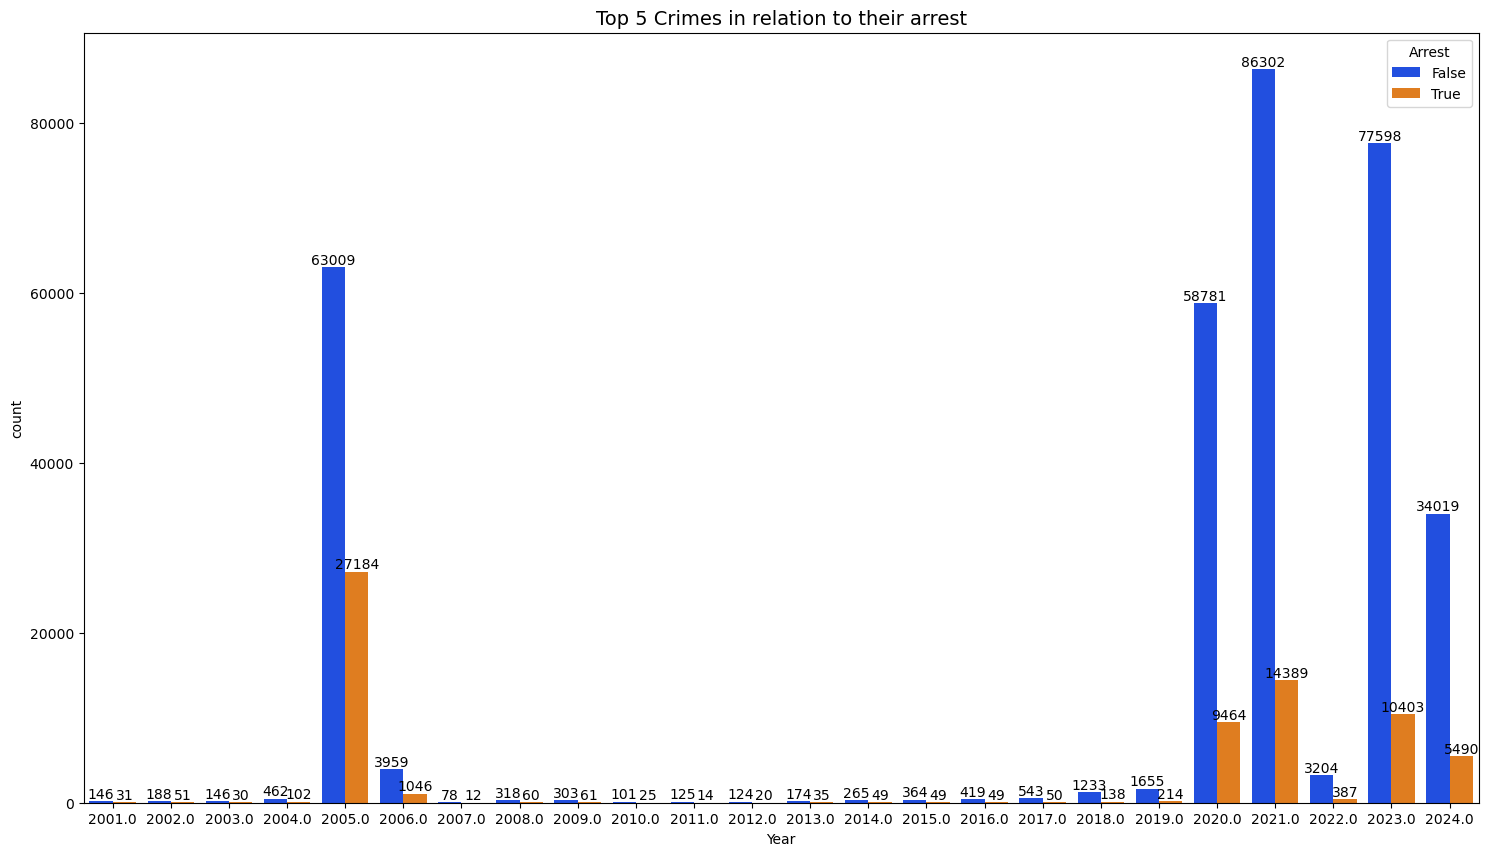

In [22]:
fig = plt.figure(figsize=(18,10))
ax = sns.countplot(x = "Year",hue = "Arrest",palette = "bright",data = df )

for label in ax.containers:
    ax.bar_label(label)
plt.title("Top 5 Crimes in relation to their arrest",fontsize = 14)
plt.show()

2005 had the highest arrest rates 

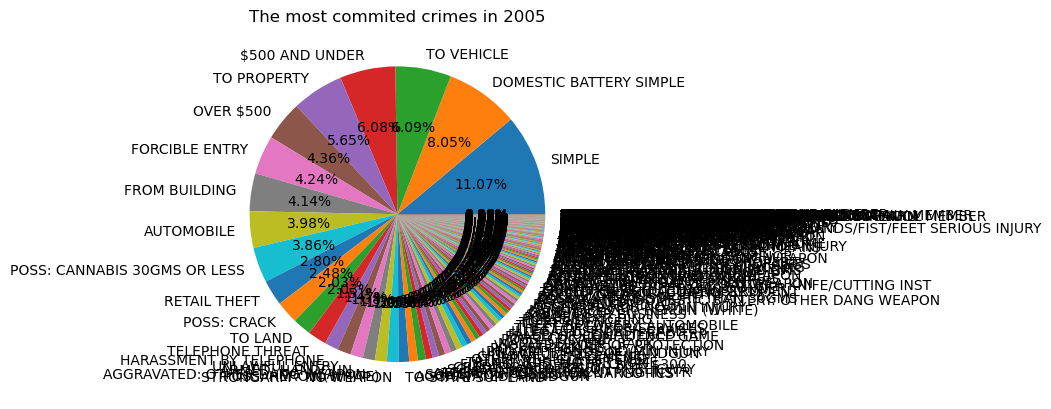

In [24]:
Year2005=df[df['Year']==2005]
plt.pie(Year2005["Description"].value_counts(),labels = Year2005["Description"].value_counts().index,autopct = "%.2f%%")
plt.title("The most commited crimes in 2005")
plt.show()